In [1]:
import numpy as np
import pandas as pd

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)  

In [2]:
prod=pd.read_csv('Africa Food Production (2004 - 2013).csv')
#prod["Year"]=pd.to_datetime(prod["Year"], format='%Y')
prod1 = pd.DataFrame(prod.groupby(['Country','Year', 'Item', 'Value'])['Value'].sum().sort_values( ascending=False))
prod1

Value
Country       Year Item                 Value       
Nigeria       2012 Cassava and products 54000  54000
              2013 Cassava and products 53000  53000
              2011 Cassava and products 52403  52403
              2006 Cassava and products 45721  45721
              2008 Cassava and products 44582  44582
...                                              ...
Mauritania    2006 Groundnut Oil        0          0
                   Molluscs, Other      0          0
                   Pigmeat              0          0
Cabo Verde    2011 Oilcrops, Other      0          0
Guinea-Bissau 2012 Freshwater Fish      0          0

[23110 rows x 1 columns]

In [3]:
supply=pd.read_csv('Africa Food Supply (2004 - 2013).csv')
supply["Year"] = pd.to_datetime(supply["Year"], format="%Y")
supply.head()

,Country,Year,Value
0,Algeria,2004-01-01,2987
1,Algeria,2005-01-01,2958
2,Algeria,2006-01-01,3047
3,Algeria,2007-01-01,3041
4,Algeria,2008-01-01,3048


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid')

In [5]:
prod2=pd.DataFrame(prod.groupby(["Country" ])["Value"].mean())

prod2

,Value
Country,
Algeria,325.258621
Angola,362.035185
Benin,149.274576
Botswana,14.141176
Burkina Faso,232.858140
Cabo Verde,5.024242
Cameroon,304.107692
Central African Republic,55.380000
Chad,115.584615


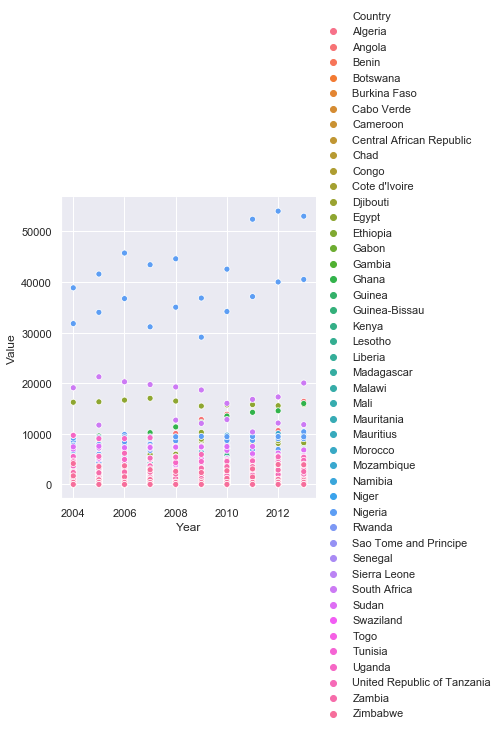

In [6]:
sns.relplot( x="Year", y="Value", hue="Country", data=prod)

<Figure size 2160x864 with 0 Axes>

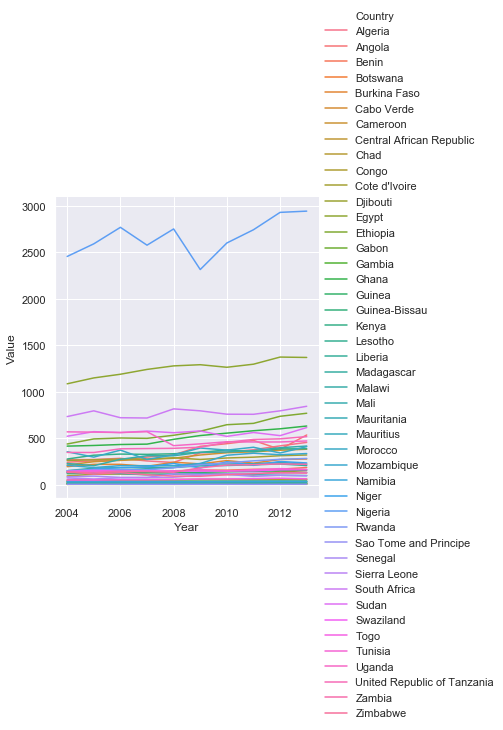

In [7]:
plt.figure(figsize=(30,12))
sns.relplot(kind="line",x='Year', hue='Country', ci=None, y="Value", data=prod);

In [8]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot 

In [9]:
df2012 = prod[prod.Year == 2012]
pie2012 = df2012.Value


In [10]:
labels = df2012.Country

In [11]:
fig = {
    "data": [
        {
            "values":prod.Value,
            "labels":labels,
            "domain":{"x": [0, .5]},
            "name": "Country food production for 2012",
            "hoverinfo": "label+percent+name",
            "hole":.2,
            "type":"pie"
        },
    ],
    "layout":{
        "title":"something sha",
        "annotations": [
            {
                "font": {"size":20},
                "showarrow":False,
                "text": "somthg",
                "x":0.20,
                "y":1
            },
        ]
    }
}


In [12]:
iplot(fig)

In [13]:
data=[
    {
        "y":df2012.Value,
        "x":df2012.Year,
        "mode": "markers",
        "markers": {
            "color":df2012.Country,
            "size":df2012.Value,
            "showscale":True
        },
        "text":df2012.Country
    }
]


In [14]:
#iplot(data)

In [15]:
df = prod[prod.Year == 2012]
fig = px.pie(df, values="Value", names="Country")
fig.show()

NameError: name 'px' is not defined

In [16]:
import plotly.graph_objects as go

labels = ['Oxygen','Hydrogen','Carbon_Dioxide','Nitrogen']
values = [4500, 2500, 1053, 500]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

In [17]:
import plotly.offline as pyo
import plotly.graph_objs as go
# Set notebook mode to work in offline
pyo.init_notebook_mode()
# Create traces
trace0 = go.Scatter(
    x=[1, 2, 3, 4],
    y=[10, 15, 13, 17]
)
trace1 = go.Scatter(
    x=[1, 2, 3, 4],
    y=[16, 5, 11, 9]
)
# Fill out data with our traces
data = [trace0, trace1]
# Plot it and save as basic-line.html
pyo.iplot(data, filename = 'basic-line')


In [18]:
import plotly.express as px
#df = px.data.prod() # iris is a pandas DataFrame
df = prod
fig = px.line(df, x="Year", y="Value", color="Country")
fig.show()

# Data labels on labels

In [19]:
import plotly.graph_objects as go
data=prod
fig = go.Figure(data=go.Scatter(x=prod['Year'],
                               y=prod['Value'],
                               mode = 'markers',
                               marker_color=prod['Year'],
                               text=prod["Country"]))

fig.update_layout(title='Africa Food Data')
fig.show()